# Fresh code to analyze pooled data from ELS cohorts 1 and 2
* basics 5/27/2023 GT

In [2]:
!git clone https://github.com/GergelyTuri/sleep.git
%cd sleep
!pip install .

Cloning into 'sleep'...
remote: Enumerating objects: 221, done.
remote: Counting objects: 100% (221/221), done.
remote: Compressing objects: 100% (157/157), done.
remote: Total 221 (delta 113), reused 148 (delta 53), pack-reused 0
Receiving objects: 100% (221/221), 1.07 MiB | 11.40 MiB/s, done.
Resolving deltas: 100% (113/113), done.
/content/sleep
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/sleep
  Preparing metadata (setup.py) ... done
  Created wheel for sleep: filename=sleep-0.1-py3-none-any.whl size=997 sha256=612b50c6870a670427c2b3457a20f7ebc42bd5e42b26e792aa830cdb7200d1c9
  Stored in directory: /tmp/pip-ephem-wheel-cache-46m83t55/wheels/10/eb/42/5281370ac4a2d7b033087761ebaa8f968a9ef5108cbc009a46
Successfully built sleep


In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('talk')

from sleep.base import core
%matplotlib inline

In [2]:
core.mount_drive()
dr = core.GoogleDrive()
save_dir = Path('/gdrive/Shareddrives/Turi_lab/Data/PTSD_project/' \
                '!analysis/saveFolder/ELS')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
raw_data = dr.load_spreadsheet_data('all_cohorts_freezing_FINAL')

In [4]:
# replacing NA to NaN
raw_data.replace('NA', np.NaN, inplace=True)
# changing `freezing` dtype to float
raw_data['freezing'] = pd.to_numeric(raw_data['freezing'],
                                        downcast='float')
raw_data['sex'] = pd.Categorical(raw_data['sex']) 
# adding unique ID-s based on `id` and `cohort`
raw_data['cohort_id']= raw_data['cohort']+'_'+raw_data['id']

# TODO add DOB-s
# calculate time after SEFLA column
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 1 to 1593
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   freezing           1580 non-null   float32 
 1   genotype           1593 non-null   object  
 2   id                 1585 non-null   object  
 3   day                1593 non-null   object  
 4   condition          1593 non-null   object  
 5   sex                1593 non-null   category
 6   cohort             1593 non-null   object  
 7   exposure_mins      1588 non-null   object  
 8   analyzed_duration  1588 non-null   object  
 9   date               1524 non-null   object  
 10  time               1516 non-null   object  
 11  els                1593 non-null   object  
 12  psilocybin         1593 non-null   object  
 13  cohort_id          1585 non-null   object  
dtypes: category(1), float32(1), object(12)
memory usage: 157.4+ KB


In [5]:
day_list = ['sefla','seflb','recall1', 'recall2', 'recall3',
            'recall4', 'recall5']

### Getting ELS mice

In [34]:
els  = raw_data.query("cohort.str.startswith('els') and day in @day_list")
print(els.groupby(['condition', 'els', 'sex'])['cohort_id'].nunique())
print('\n')
print(els.groupby(['condition', 'els'])['cohort_id'].nunique())

condition  els  sex   
control    n    female     7
                male       7
           y    female    15
                male       9
sefl       n    female     6
                male       8
           y    female    14
                male       9
Name: cohort_id, dtype: int64


condition  els
control    n      14
           y      24
sefl       n      14
           y      23
Name: cohort_id, dtype: int64


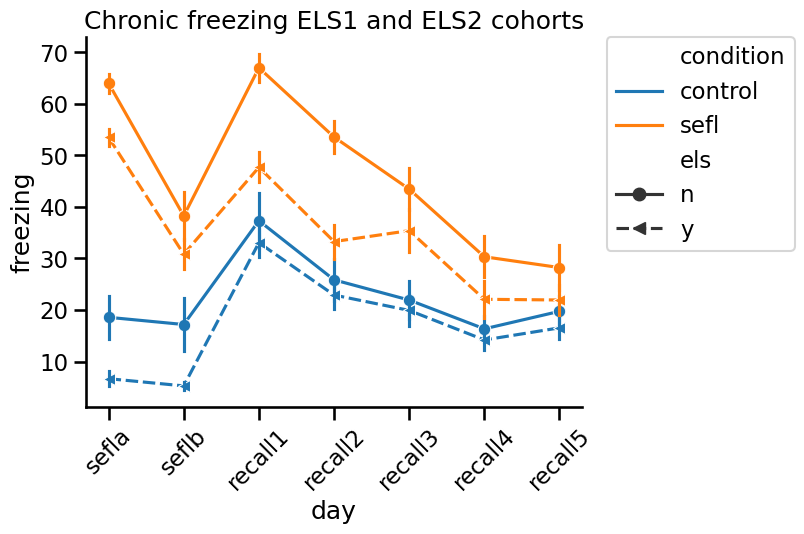

In [7]:
g = sns.lineplot(data=els, x='day', y='freezing', hue='condition',
                 style='els', markers=['o', '<'], errorbar='se',
                 err_style='bars')
plt.title('Chronic freezing ELS1 and ELS2 cohorts')
plt.setp(g.get_xticklabels(), rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig(save_dir.joinpath('All ELS mice freezing.png'), 
            bbox_inches='tight', dpi=300)

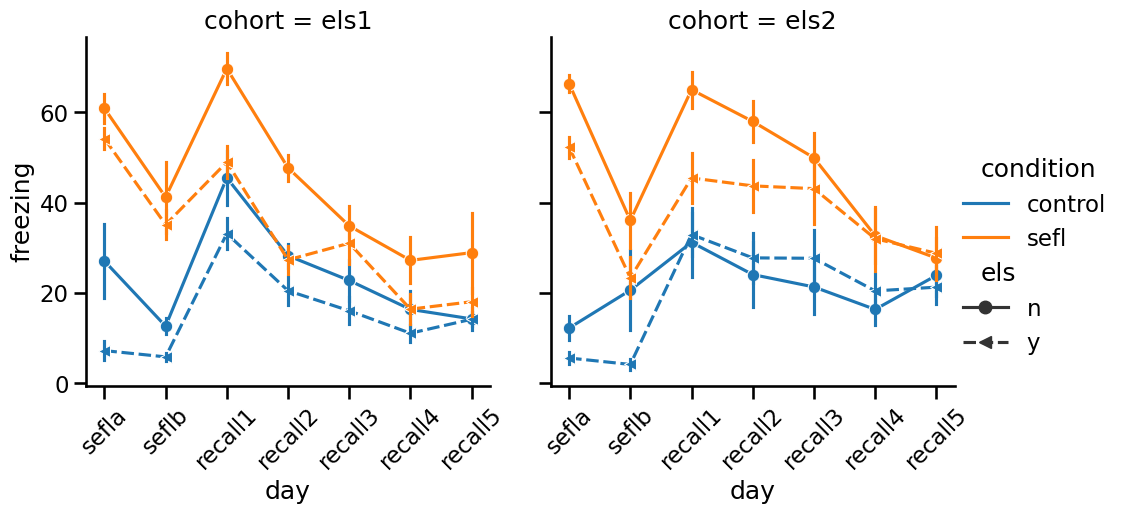

In [8]:
g = sns.relplot(data=els, kind="line", x="day", y="freezing",
                hue="condition",
                 style="els", markers=['o', '<'], errorbar="se",
                 err_style="bars", col="cohort")
g.set_xticklabels(rotation=45)
sns.despine()
plt.savefig(save_dir.joinpath('ELS1 and ELS2 cohorts freezing.png'), 
            bbox_inches='tight', dpi=300)

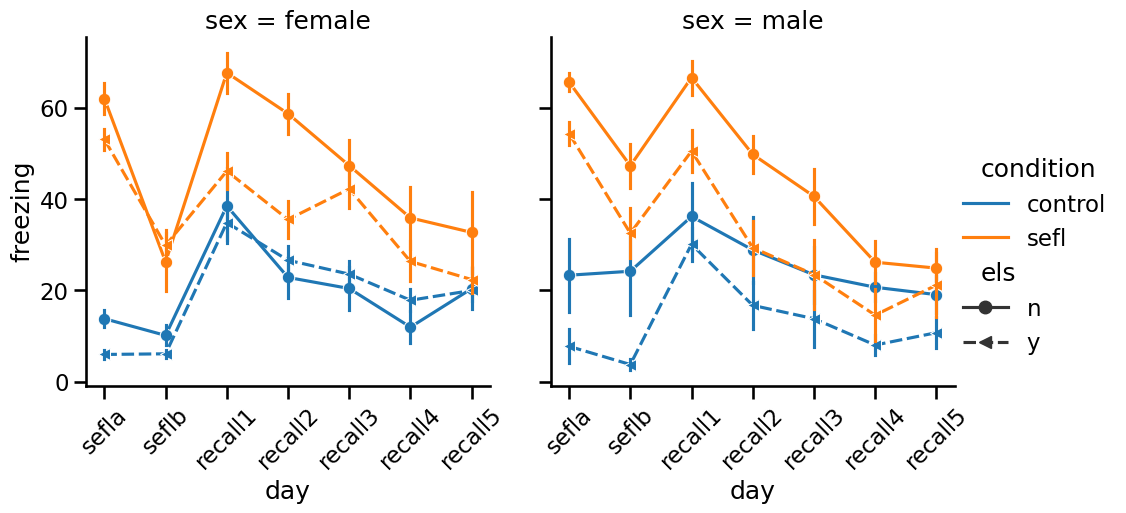

In [9]:
g = sns.relplot(data=els, kind="line", x="day", y="freezing",
                hue="condition",
                 style="els", markers=['o', '<'], errorbar="se",
                 err_style="bars", col="sex")
g.set_xticklabels(labels=day_list, rotation=45)
# plt.setp(g.get_xticklabels(), rotation=45)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig(save_dir.joinpath('Male vs Female ELS mice freezing.png'), 
            bbox_inches='tight', dpi=300)

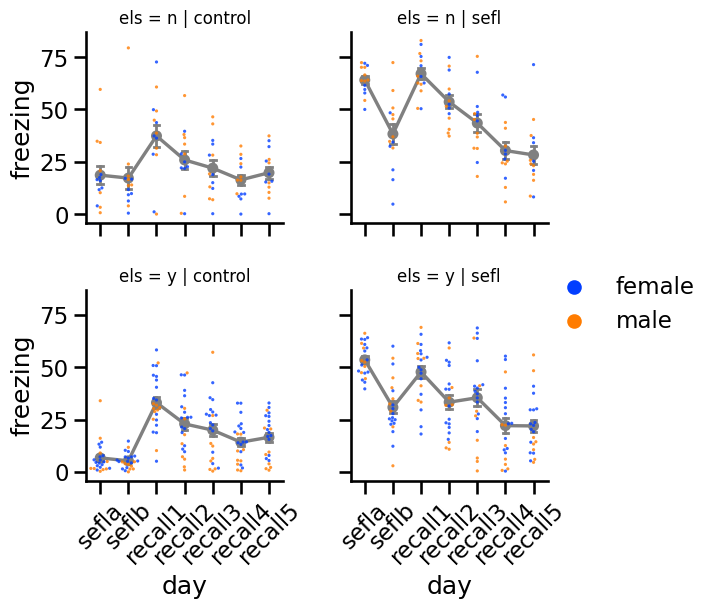

In [33]:
# sns.set(font_scale=0.8)
g = sns.FacetGrid(els, col='condition', row='els')
g.map_dataframe(sns.pointplot, 'day','freezing', order=day_list, errorbar='se',
      color='grey', scale=0.6, errwidth=2, capsize=0.2)
g.map_dataframe(sns.swarmplot, x='day',y='freezing',hue='sex',alpha=.8, size=2.3, 
                order=day_list, palette='bright')
g.add_legend()
g.set_xticklabels(labels=day_list, rotation=45)
g.set_titles(col_template="{col_name}", size=12)
g.savefig(save_dir.joinpath('Individual ELS mice freezing.png'), 
            bbox_inches='tight', dpi=300)